## Overview

In [1]:
# For each of the following questions, formulate a null and alternative hypothesis 
# (be as specific as you can be), then give an example of what a true positive, true negative,
# type I and type II errors would look like. Note that some of the questions are 
# intentionally phrased in a vague way. It is your job to reword these as more 
# precise questions that could be tested.

# Has the network latency gone up since we switched internet service providers?

# Null - The network latency has not changed since we changed internet service providers.
# Alternative - The network latency has gotten worse since we changed internet service providers.
# True Positive - The null hypothesis is not true and we rejected it
# True Negative - The null hypothesis is true and we accepted it.
# Type I - The null hypothesis was rejected but it's true.
# Type II - The null hypothesis was not rejected but it's false.

# Is the website redesign any good?
# Is the website redesign attracting more users?

# Null - The website redesign is not changing the amount of users.
# Alternative - The website redesign is increasing the amount of users.
# True Positive - The null hypothesis is not true and we rejected it
# True Negative - The null hypothesis is true and we accepted it.
# Type I - The null hypothesis was rejected but it's true.
# Type II - The null hypothesis was not rejected but it's false. 

# Is our television ad driving more sales?

# Null - The television add has not changed the sales.
# Alternative - The television add has increased the sales.
# True Positive - The null hypothesis is not true and we rejected it
# True Negative - The null hypothesis is true and we accepted it.
# Type I - The null hypothesis was rejected but it's true.
# Type II - The null hypothesis was not rejected but it's false.


## T-Test

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from pydataset import data
import seaborn as sns
import math
alpha = .05

In [3]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different 
# for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days 
# and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean 
# of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

# Null - There is no difference in the average time it takes to sell homes in the different offices.

# office1 = stats.norm(90, 15)
# avg_time1 = office1.pdf(40)

# office2 = stats.norm(100, 20)
# avg_time2 = office1.pdf(50)

# office1_rand = stats.norm.rvs(90, 15, size=100)
# office2_rand = stats.norm.rvs(100, 20, size=100)
# f, p = stats.f_oneway(office1_rand, office2_rand)
# if p < alpha:
#     print("We reject $H_{0}$")
# else:
#     print("We fail to reject $H_{0}$")


In [4]:
f, p = stats.ttest_ind_from_stats(90,15,40,100,20,50,equal_var=False)
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


In [5]:
# Load the mpg dataset and use it to answer the following questions:

mpg = data('mpg')

# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

mpg['average_mileage'] = ((mpg.cty + mpg.hwy)/2)
mpg_2008 = mpg.loc[(mpg['year'] == 2008)]
mpg_1999 = mpg.loc[(mpg['year'] == 1999)]
fuel_eff_2008 = mpg_2008.average_mileage.mean()
fuel_eff_1999 = mpg_1999.average_mileage.mean()
print(mpg_2008.average_mileage.var())
print(mpg_1999.average_mileage.var())
f, p = stats.f_oneway(mpg_2008.average_mileage, mpg_1999.average_mileage)
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

24.097480106100797
27.122605363984682
We fail to reject $H_{0}$


In [6]:
# Are compact cars more fuel-efficient than the average car?

compact = ['compact']
mpg_avg_car = mpg[~mpg['class'].isin(compact)]
mpg_compact = mpg.loc[(mpg['class'] == 'compact')]
t, p = stats.ttest_ind(mpg_compact.average_mileage, mpg_avg_car.average_mileage, equal_var=False)
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

is p/2 < alpha?  True
is t > 0?  True
We reject $H_{0}$


In [7]:
# Do manual cars get better gas mileage than automatic cars?

mpg['is_automatic'] = mpg.trans.str.startswith('a')
mpg_auto = mpg.loc[(mpg['is_automatic'] == True)]
mpg_manual = mpg.loc[(mpg['is_automatic'] == False)]
print(mpg_auto.average_mileage.var())
print(mpg_manual.average_mileage.var())
t, p = stats.ttest_ind(mpg_manual.average_mileage, mpg_auto.average_mileage, equal_var=False)
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

21.942777233382337
26.635167464114826
is p/2 < alpha?  True
is t > 0?  True
We reject $H_{0}$


In [8]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,False


## Correlation

In [2]:
import env
user = env.user
host = env.host
password = env.password

import os
os.path.exists('env.py')

def get_db_url(db, env_file=os.path.exists('env.py')):
    if env_file:
        user, password, host = (env.user, env.password, env.host)
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [10]:
# Use the telco_churn data. 

url_telco_churn = get_db_url('telco_churn')
telco_churn = pd.read_sql('SELECT * FROM customers;', url_telco_churn)

# Does tenure correlate with monthly charges? Total charges? 

telco_churn1 = telco_churn.fillna(0)
telco_churn1 = telco_churn1.total_charges.str.strip()
total_charge = telco_churn1.str.replace('', '0').astype('float')
x = telco_churn.tenure
a = telco_churn.monthly_charges
b = total_charge
corr, p = stats.pearsonr(x, a)
corr2, p2 = stats.pearsonr(x, b)
print(corr, p)
print(corr2, p2)


0.24789985628615246 4.094044991483017e-99
0.8071249668646957 0.0


In [19]:
telco_churn

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [38]:
# What happens if you control for phone and internet service?

phone_yes = telco_churn [telco_churn.phone_service == 'Yes']
phone_no = telco_churn [telco_churn.phone_service == 'No']
internet_1 = telco_churn [telco_churn.internet_service_type_id == 1]
internet_2 = telco_churn [telco_churn.internet_service_type_id == 2]
internet_3 = telco_churn [telco_churn.internet_service_type_id == 3]
phone_yes.total_charges = phone_yes.total_charges.str.strip().str.replace('', '0').astype('float')
phone_no.total_charges = phone_no.total_charges.str.strip().str.replace('', '0').astype('float')
internet_1.total_charges = internet_1.total_charges.str.strip().str.replace('', '0').astype('float')
internet_2.total_charges = internet_2.total_charges.str.strip().str.replace('', '0').astype('float')
internet_3.total_charges = internet_3.total_charges.str.strip().str.replace('', '0').astype('float')


/var/folders/vy/hnssqbw53999z9_6dhflqy780000gn/T/ipykernel_1667/2724581585.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phone_yes.total_charges = phone_yes.total_charges.str.strip().str.replace('', '0').astype('float')
/var/folders/vy/hnssqbw53999z9_6dhflqy780000gn/T/ipykernel_1667/2724581585.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phone_no.total_charges = phone_no.total_charges.str.strip().str.replace('', '0').astype('float')
/var/folders/vy/hnssqbw53999z9_6dhflqy780000gn/T/ipykernel_166

In [39]:
x = phone_yes.tenure
y = phone_yes.total_charges
corr, p = stats.pearsonr(x, y)
print(corr, p)

0.8125169602722925 0.0


In [40]:
x = phone_no.tenure
y = phone_no.total_charges
corr, p = stats.pearsonr(x, y)
print(corr, p)

0.9195213771067062 5.480677543463563e-278


In [41]:
x = internet_1.tenure
y = internet_1.total_charges
corr, p = stats.pearsonr(x, y)
print(corr, p)

0.9232776738659695 0.0


In [42]:
x = internet_2.tenure
y = internet_2.total_charges
corr, p = stats.pearsonr(x, y)
print(corr, p)

0.9779561164669259 0.0


In [43]:
x = internet_3.tenure
y = internet_3.total_charges
corr, p = stats.pearsonr(x, y)
print(corr, p)

0.8745467639271123 0.0


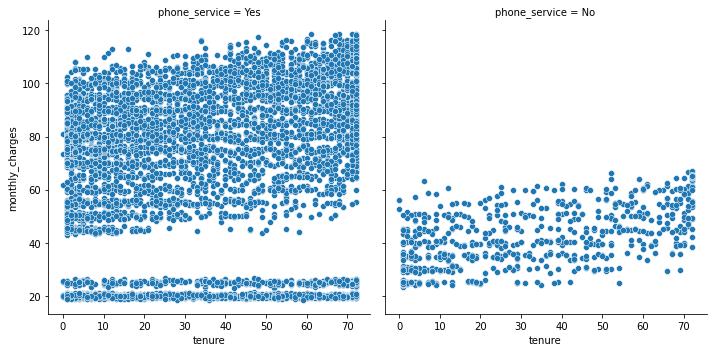

In [21]:
sns.relplot(data=telco_churn, x=telco_churn.tenure, y=telco_churn.monthly_charges, col=telco_churn.phone_service)
plt.show()

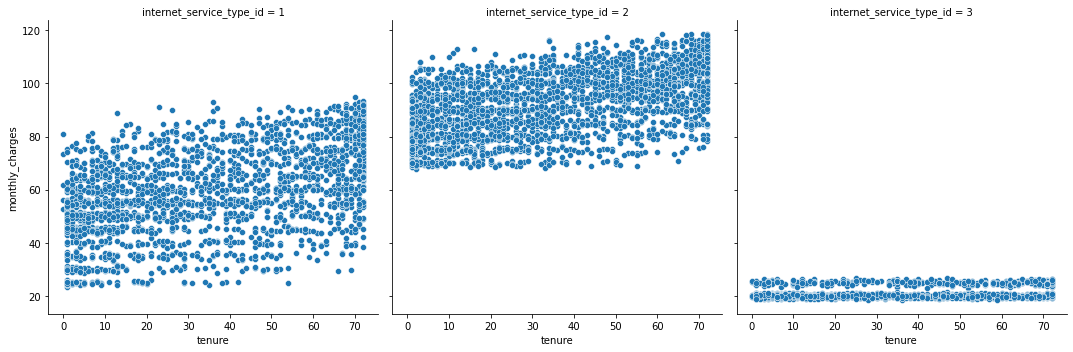

In [22]:
sns.relplot(data=telco_churn, x=telco_churn.tenure, y=telco_churn.monthly_charges, col=telco_churn.internet_service_type_id)
plt.show()

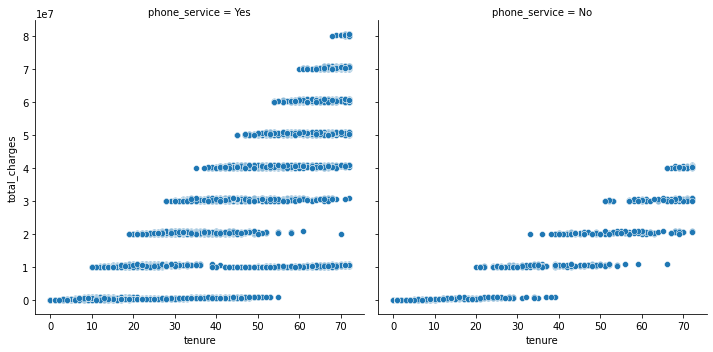

In [25]:
sns.relplot(data=telco_churn, x=telco_churn.tenure, y=total_charge, col=telco_churn.phone_service)
plt.show()

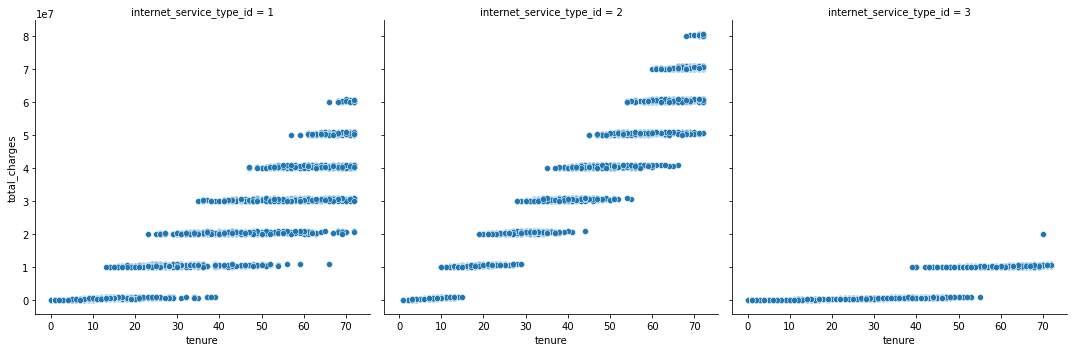

In [26]:
sns.relplot(data=telco_churn, x=telco_churn.tenure, y=total_charge, col=telco_churn.internet_service_type_id)
plt.show()

In [16]:
# Use the employees database.

url_employees= get_db_url('employees')
employees = pd.read_sql('SELECT * , DATEDIFF(NOW(), from_date) AS days_worked FROM employees JOIN salaries USING(emp_no) WHERE to_date > NOW() LIMIT 10000;', url_employees)

# Is there a relationship between how long an employee has been with the company and their salary?

x = employees.days_worked
y = employees.salary
corr, p = stats.pearsonr(x, y)
print(corr, p)


-0.049377026957560036 7.808302874791204e-07


In [17]:
# Is there a relationship between how long an employee has been with the company and the number of titles they have had?

emp_title = pd.read_sql('SELECT emp_no, COUNT(title) AS titles_held FROM titles GROUP BY emp_no LIMIT 10000 ;', url_employees)
employees2 = pd.read_sql('SELECT * , DATEDIFF(NOW(), from_date) AS days_worked FROM employees JOIN salaries USING(emp_no) LIMIT 10000 ;', url_employees)
x = employees2.days_worked
y = emp_title.titles_held


In [18]:
corr, p = stats.pearsonr(x, y)
print(corr, p)

0.0035450421345921647 0.2622749805150237


In [50]:
# Use the sleepstudy data. Is there a relationship between days and reaction time?

sleepstudy = data('sleepstudy')
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [45]:
x = sleepstudy.Reaction
y = sleepstudy.Days
corr, p = stats.pearsonr(x, y)
print(corr, p)

0.5352302262650255 9.89409632221439e-15


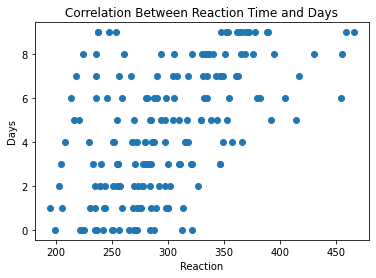

In [51]:
plt.scatter(sleepstudy.Reaction, sleepstudy.Days)
plt.xlabel('Reaction')
plt.ylabel('Days')
plt.title('Correlation Between Reaction Time and Days')
plt.show()

## Chi Square

In [61]:
# Use the following contingency table to help answer the question of 
# whether using a macbook and being a codeup student are 
# independent of each other.

# Was doing it the manual way

# codeup_student = 50/100
# not_codeup_student = 50/100
# uses_macbook = 69/100
# doesnt_use_macbook = 31/100
# codeup_student * uses_macbook
# codeup_student * doesnt_use_macbook
# not_codeup_student * uses_macbook
# not_codeup_student * doesnt_use_macbook

# Quick way
observed = ([49, 20], [1, 30])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

Observed

([49, 20], [1, 30])
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000
We reject $H_{0}$


In [51]:
# Choose another 2 categorical variables from the mpg dataset and perform 
# a chi2 contingency table test with them. Be sure to state your null 
# and alternative hypotheses.

mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [52]:
n = mpg.shape[0]

drive_proportions = mpg.drv.value_counts() / n
drive_proportions

f    0.452991
4    0.440171
r    0.106838
Name: drv, dtype: float64

In [53]:
cyl_proportions = mpg.cyl.value_counts() / n
cyl_proportions

4    0.346154
6    0.337607
8    0.299145
5    0.017094
Name: cyl, dtype: float64

In [54]:
expected = pd.DataFrame()

for drive_group, d_prop in drive_proportions.iteritems():
    for cyl_group, c_prop in cyl_proportions.iteritems():
        expected.loc[drive_group, cyl_group] = d_prop * c_prop

expected.sort_index(inplace=True)
expected

,4,6,8,5
4,0.152367,0.148605,0.131675,0.007524
f,0.156805,0.152933,0.135510,0.007743
r,0.036982,0.036069,0.031960,0.001826


In [55]:
expected *= n
expected

,4,6,8,5
4,35.653846,34.773504,30.811966,1.760684
f,36.692308,35.786325,31.709402,1.811966
r,8.653846,8.440171,7.478632,0.427350


In [56]:
observed = pd.crosstab(mpg.drv, mpg.cyl)
observed

cyl,4,5,6,8
drv,,,,
4,23,0,32,48
f,58,4,43,1
r,0,0,4,21


In [57]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

98.13550541481473

In [58]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [59]:
stats.chi2(degrees_of_freedom).sf(chi2)

6.143348809350951e-19

### Next Test

In [27]:
cyl_proportions = mpg.cyl.value_counts() / n
cyl_proportions

4    0.346154
6    0.337607
8    0.299145
5    0.017094
Name: cyl, dtype: float64

In [28]:
expected = pd.DataFrame()

for manufacturer_group, m_prop in manufacturer_proportions.iteritems():
    for cyl_group, c_prop in cyl_proportions.iteritems():
        expected.loc[manufacturer_group, cyl_group] = m_prop * c_prop

expected.sort_index(inplace=True)
expected

,4,6,8,5
audi,0.026627,0.025970,0.023011,0.001315
chevrolet,0.028107,0.027413,0.024290,0.001388
dodge,0.054734,0.053382,0.047301,0.002703
ford,0.036982,0.036069,0.031960,0.001826
honda,0.013314,0.012985,0.011506,0.000657
hyundai,0.020710,0.020199,0.017898,0.001023
jeep,0.011834,0.011542,0.010227,0.000584
land rover,0.005917,0.005771,0.005114,0.000292
lincoln,0.004438,0.004328,0.003835,0.000219
mercury,0.005917,0.005771,0.005114,0.000292


In [29]:
expected *= n
expected

,4,6,8,5
audi,6.230769,6.076923,5.384615,0.307692
chevrolet,6.576923,6.414530,5.683761,0.324786
dodge,12.807692,12.491453,11.068376,0.632479
ford,8.653846,8.440171,7.478632,0.427350
honda,3.115385,3.038462,2.692308,0.153846
hyundai,4.846154,4.726496,4.188034,0.239316
jeep,2.769231,2.700855,2.393162,0.136752
land rover,1.384615,1.350427,1.196581,0.068376
lincoln,1.038462,1.012821,0.897436,0.051282
mercury,1.384615,1.350427,1.196581,0.068376


In [30]:
observed = pd.crosstab(mpg.manufacturer, mpg.cyl)
observed

cyl,4,5,6,8
manufacturer,,,,
audi,8,0,9,1
chevrolet,2,0,3,14
dodge,1,0,15,21
ford,0,0,10,15
honda,9,0,0,0
hyundai,8,0,6,0
jeep,0,0,3,5
land rover,0,0,0,4
lincoln,0,0,0,3


In [31]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

198.11753580416368

In [32]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [33]:
stats.chi2(degrees_of_freedom).sf(chi2)

4.0518621792685397e-22

In [35]:
# Use the data from the employees database to answer these questions:

url_employees = get_db_url('employees')
df = pd.read_sql('''SELECT * FROM employees JOIN dept_emp USING(emp_no) WHERE to_date > NOW() AND (dept_no LIKE 'd007' OR dept_no LIKE 'd001') ;''', url_employees)


In [36]:
# Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

n = df.shape[0]

gender_proportions = df.gender.value_counts() / n
gender_proportions

M    0.602935
F    0.397065
Name: gender, dtype: float64

In [38]:
department_proportions = df.dept_no.value_counts() / n
department_proportions

d007    0.717527
d001    0.282473
Name: dept_no, dtype: float64

In [39]:
expected = pd.DataFrame()

for gender_group, g_prop in gender_proportions.iteritems():
    for department_group, d_prop in department_proportions.iteritems():
        expected.loc[gender_group, department_group] = g_prop * d_prop

expected.sort_index(inplace=True)
expected

,d007,d001
F,0.284905,0.112160
M,0.432622,0.170313


In [40]:
expected *= n
expected

,d007,d001
F,14969.757399,5893.242601
M,22731.242601,8948.757399


In [41]:
observed = pd.crosstab(df.gender, df.dept_no)
observed

dept_no,d001,d007
gender,,
F,5864,14999
M,8978,22702


In [42]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

0.33540487836681343

In [43]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [44]:
stats.chi2(degrees_of_freedom).sf(chi2)

0.5624936990655429

In [45]:
# Is an employee's gender independent of whether or not they are or have been a manager?

managers = pd.read_sql('''SELECT * FROM employees JOIN dept_manager USING(emp_no) ;''', url_employees)
managers.shape[0]

24

In [49]:
employees = pd.read_sql('''SELECT * FROM employees ;''', url_employees)
emp = employees.shape[0]
emp = emp - 24
emp

300000

In [48]:
employees.gender.value_counts()

M    179973
F    120051
Name: gender, dtype: int64

In [60]:
observed = ([24, 300000], [179973, 120051])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

Observed

([24, 300000], [179973, 120051])
---
Expected

[[ 89998.5 210025.5]
 [ 89998.5 210025.5]]
---

chi^2 = 256987.9447
p     = 0.0000
We reject $H_{0}$
